In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import math
import osmnx as ox

In [2]:
# Define the graph as a dictionary
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}},
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}},
    "L": {"F": {"volume": 3}},
    "M": {"G": {"volume": 7}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
}

In [3]:
#When .5, always round up to nearest integer
def custom_round(value):
    return math.floor(value + 0.5) if value >= 0 else math.ceil(value - 0.5)

#Retrieves the neighbors of the current node
def get_connected_neighbors(graph_dict, node):
    connected_neighbors = list(graph_dict[node].keys())
    return connected_neighbors

#Function for calculating the mean between the neighbors of the edge where volume attribute is missing
def fill_missing_volume(graph_dict, node):
    connected_neighbors = get_connected_neighbors(graph_dict, node)

    for neighbor in connected_neighbors:
        if graph_dict[node][neighbor]["volume"] == "?":
            neighbor_connected_nodes = get_connected_neighbors(graph_dict, neighbor)
            volumes_from_node = []
            volumes_to_neighbor = []

            for n in connected_neighbors:
                if n != neighbor:
                    volumes_from_node.append(graph_dict[node][n]["volume"])

            for n in neighbor_connected_nodes:
                if n != node:
                    volumes_to_neighbor.append(graph_dict[neighbor][n]["volume"])

            volumes_from_node = [v for v in volumes_from_node if v != "?"]
            volumes_to_neighbor = [v for v in volumes_to_neighbor if v != "?"]

            avg_volume = custom_round((sum(volumes_from_node) + sum(volumes_to_neighbor)) / (len(volumes_from_node) + len(volumes_to_neighbor)))

            graph_dict[node][neighbor]["volume"] = avg_volume
            graph_dict[neighbor][node]["volume"] = avg_volume

# Fills the missing volumes in the graph_dict
for node in graph_dict:
    fill_missing_volume(graph_dict, node)


In [4]:
# Saves graph_dict as json for further usage
with open("graphJson.json", "w") as f:
    json.dump(graph_dict, f, indent=4)

In [5]:
# Creates an empty directed graph
G = nx.DiGraph()

In [6]:

# Iterating through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        G.add_edge(node, neighbor, **attributes)

In [7]:
#Graph layout settings
pos = nx.spring_layout(G, seed=2)
labels = {(u, v): data["volume"] for u, v, data in G.edges(data=True)}


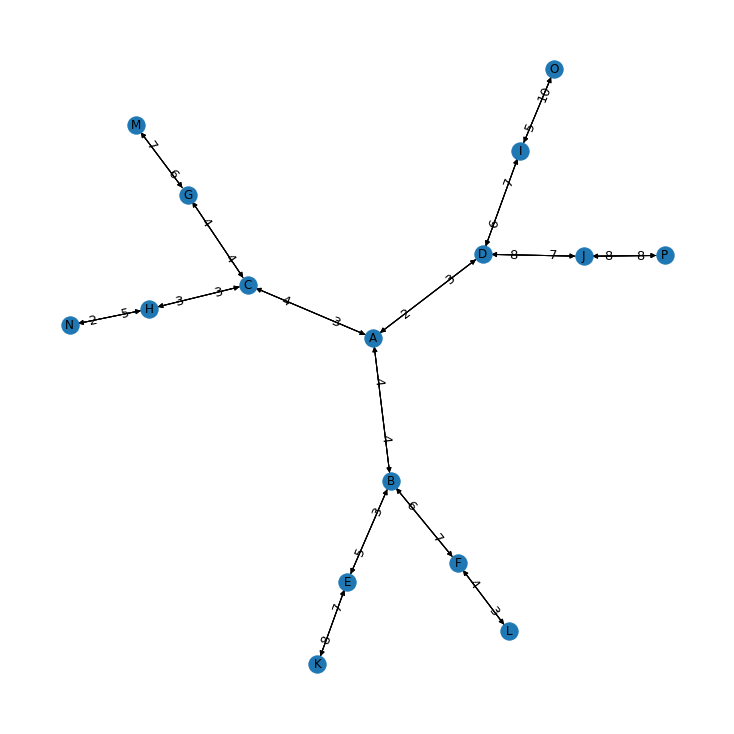

In [8]:
#Graph figure settings
plt.figure(figsize=(10, 10))
nx.draw(G, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(
    G, pos, labels, label_pos=0.7,  bbox=dict(alpha=0), font_size=13
)
nx.draw_networkx_edges(G, pos, arrows=True)
plt.savefig("undirected_digraphFromDict.png", dpi=400)
plt.show()

##
*Testing flow algorithm*
##

In [84]:
graph_dict = {
    "A": {"B": {"volume": "?"}, "C": {"volume": 3},   "D": {"volume": 2}, "Q": {"volume": 10} },
    "B": {"A": {"volume": "?"}, "E": {"volume": 3},   "F": {"volume": 6}},
    "C": {"A": {"volume": 4},   "G": {"volume": "?"}, "H": {"volume": 3}},
    "D": {"A": {"volume": 3},   "I": {"volume": 6},   "J": {"volume": 8}},
    "E": {"B": {"volume": 5},   "K": {"volume": 7}},
    "F": {"B": {"volume": 7},   "L": {"volume": 4}},
    "G": {"C": {"volume": "?"}, "M": {"volume": 6}},
    "H": {"C": {"volume": 3},   "N": {"volume": 5}, "Q": {"volume": 10}, "M": {"volume": 7}},
    "I": {"D": {"volume": 7},   "O": {"volume": 5}},
    "J": {"D": {"volume": 7},   "P": {"volume": 8}},
    "K": {"E": {"volume": 8}, "Q": {"volume": 3}},
    "L": {"F": {"volume": 3}, "M": {"volume": 4}},
    "M": {"G": {"volume": 7}, "H": {"volume": 4}, "L": {"volume": 5}},
    "N": {"H": {"volume": 2}},
    "O": {"I": {"volume": 10}},
    "P": {"J": {"volume": 8}},
    "Q": {"A": {"volume": 5}, "H": {"volume": 4}, "K": {"volume": 4}},
}


#When .5, always round up to nearest integer
def custom_round(value):
    return math.floor(value + 0.5) if value >= 0 else math.ceil(value - 0.5)

#Retrieves the neighbors of the current node
def get_connected_neighbors(graph_dict, node):
    connected_neighbors = list(graph_dict[node].keys())
    return connected_neighbors

#Function for calculating the mean between the neighbors of the edge where volume attribute is missing
def fill_missing_volume(graph_dict, node):
    connected_neighbors = get_connected_neighbors(graph_dict, node)

    for neighbor in connected_neighbors:
        if graph_dict[node][neighbor]["volume"] == "?":
            neighbor_connected_nodes = get_connected_neighbors(graph_dict, neighbor)
            volumes_from_node = []
            volumes_to_neighbor = []

            for n in connected_neighbors:
                if n != neighbor:
                    volumes_from_node.append(graph_dict[node][n]["volume"])

            for n in neighbor_connected_nodes:
                if n != node:
                    volumes_to_neighbor.append(graph_dict[neighbor][n]["volume"])

            volumes_from_node = [v for v in volumes_from_node if v != "?"]
            volumes_to_neighbor = [v for v in volumes_to_neighbor if v != "?"]

            avg_volume = custom_round((sum(volumes_from_node) + sum(volumes_to_neighbor)) / (len(volumes_from_node) + len(volumes_to_neighbor)))

            graph_dict[node][neighbor]["volume"] = avg_volume
            graph_dict[neighbor][node]["volume"] = avg_volume

# Fills the missing volumes in the graph_dict
for node in graph_dict:
    fill_missing_volume(graph_dict, node)




In [85]:
# Saves graph_dict as json for further usage
with open("tesing_flow.json", "w") as f:
    json.dump(graph_dict, f, indent=4)

In [86]:
# Creates an empty directed graph
F = nx.DiGraph()
nx.to_undirected(F)

In [87]:

# Iterating through the dictionary and add edges along with their attributes
for node, neighbors in graph_dict.items():
    for neighbor, attributes in neighbors.items():
        F.add_edge(node, neighbor, **attributes)

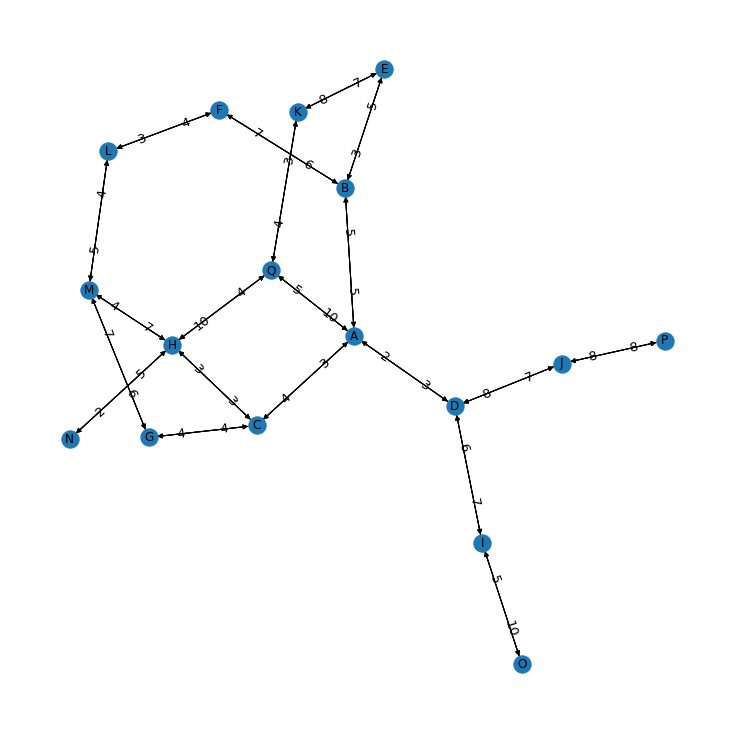

In [88]:
#Graph layout settings
pos = nx.kamada_kawai_layout(F)
#pos = nx.spring_layout(F, seed=13)

labels = {(u, v): data["volume"] for u, v, data in F.edges(data=True)}

#Graph figure settings
plt.figure(figsize=(10, 10))
nx.draw(F, pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(
    F, pos, labels, label_pos=0.7,  bbox=dict(alpha=0), font_size=13
)
nx.draw_networkx_edges(F, pos, arrows=True)
plt.savefig("undirected_digraphFromDict.png", dpi=300)
plt.show()


In [89]:
# Define the origin-destination pairs
OD_pairs = [("L", "O"), ("E", "G"), ("F", "P")]

# # Find the shortest path for each O-D pair
# for origin, destination in OD_pairs:
#     length, path = nx.bidirectional_dijkstra(F, origin, destination, weight="volume")
#     print(f"Shortest path from {origin} to {destination}: {path}")
#     print(f"Length of the shortest path: {length}")

# Find the shortest path for each O-D pair
for origin, destination in OD_pairs:
    length, path = nx.bidirectional_dijkstra(F, origin, destination, weight="volume")
    
    # Calculate the sum of the volumes in the correct direction for the path
    correct_direction_volume = 0
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        volume = F[current_node][next_node]["volume"]
        correct_direction_volume += volume
    
    print(f"Shortest path from {origin} to {destination}: {path}")
    print(f"Length of the shortest path: {length}")
    print(f"Sum of volumes in the correct direction for the path: {correct_direction_volume}")


Shortest path from L to O: ['L', 'F', 'B', 'A', 'D', 'I', 'O']
Length of the shortest path: 28
Sum of volumes in the correct direction for the path: 28
Shortest path from E to G: ['E', 'B', 'A', 'C', 'G']
Length of the shortest path: 17
Sum of volumes in the correct direction for the path: 17
Shortest path from F to P: ['F', 'B', 'A', 'D', 'J', 'P']
Length of the shortest path: 30
Sum of volumes in the correct direction for the path: 30


In [ ]:
# Find the shortest path for each O-D pair
for origin, destination in OD_pairs:
    length, path = nx.all_pairs_dijkstra_path_length(F, cutoff=None, weight="volume")
    
    # Calculate the sum of the volumes in the correct direction for the path
    correct_direction_volume = 0
    for i in range(len(path) - 1):
        current_node = path[i]
        next_node = path[i + 1]
        volume = F[current_node][next_node]["volume"]
        correct_direction_volume += volume
    
    print(f"Shortest path from {origin} to {destination}: {path}")
    print(f"Length of the shortest path: {length}")
    print(f"Sum of volumes in the correct direction for the path: {correct_direction_volume}")

In [ ]:
#Testing how to manually move nodes on a visualization

import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
matplotlib.use('TkAgg')

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

# Set up the initial node positions
pos = nx.spring_layout(G)

# Define the function that will handle mouse events
def on_press(event):
    if event.button == 1:
        # Find the node closest to the mouse click
        node, dist = nx.closest_node(G, (event.xdata, event.ydata))
        if dist < 0.05:
            # Save the current node positions
            old_pos = pos.copy()
            # Update the node positions dictionary with the new position
            pos[node] = (event.xdata, event.ydata)
            # Draw the updated network
            nx.draw_networkx(G, pos=pos)
            # Show the updated network
            plt.draw()

# Create the initial network visualization
nx.draw_networkx(G, pos=pos)

# Add the mouse event listener to the figure
fig = plt.gcf()
fig.canvas.mpl_connect('button_press_event', on_press)

# Show the network visualization
plt.show()
